In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch, FontManager


In [3]:
df_shot=pd.read_csv('shots_data/shots_openplay_foot.csv')
df_shot=df_shot[df_shot['distance']<=20]
df_shot=df_shot[df_shot['1on1']==1]
df_shot

C:\Users\ADAM\AppData\Local\Temp\ipykernel_17992\1069977551.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_shot=pd.read_csv('shots_openplay_foot.csv')


,competition_id,season_id,match_id,location,shot_outcome,shot_statsbomb_xg,under_pressure,shot_type,shot_body_part,shot_one_on_one,...,x_gk,y_gk,angle,distance,goal,1on1,underPressure,DistanceShooterGk,DistanceGk,minus
29773,7,27,3901253,"[115.3, 41.0]",Saved,0.857377,NaN,Open Play,Right Foot,True,...,117.7,38.3,79.321473,4.700000,0,1,0,3.612478,2.300000,-2.4
29774,9,27,3890367,"[115.3, 44.9]",Saved,0.521554,NaN,Open Play,Right Foot,True,...,117.9,42.8,51.321613,4.785394,0,1,0,3.342155,2.100000,-2.6
29775,11,41,69207,"[101.6, 38.6]",Saved,0.444189,NaN,Open Play,Right Foot,True,...,108.9,40.0,24.398711,18.400000,0,1,0,7.433034,11.100000,-7.3
29776,2,27,3754183,"[101.4, 43.5]",Post,0.408810,NaN,Open Play,Right Foot,True,...,106.1,42.6,23.500402,18.600000,0,1,0,4.785394,13.900000,-4.7
29777,7,27,3900576,"[108.9, 30.8]",Off T,0.466231,NaN,Open Play,Right Foot,True,...,111.2,31.9,24.837607,12.257651,0,1,0,2.549510,9.708244,-2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32755,11,27,3825695,"[114.8, 25.3]",Post,0.018246,NaN,Open Play,Left Foot,True,...,118.2,36.6,10.378973,11.896638,0,1,0,11.800424,1.800000,-3.4
32756,11,22,69282,"[115.0, 25.2]",Off T,0.016359,NaN,Open Play,Left Foot,True,...,119.2,36.3,9.948916,11.901260,0,1,0,11.868024,0.800000,-4.2
32757,37,4,19764,"[114.0, 30.0]",Saved,0.199656,NaN,Open Play,Right Foot,True,...,118.0,38.0,21.801409,8.485281,0,1,0,8.944272,2.000000,-4.0
32758,2,27,3754093,"[115.0, 25.2]",Off T,0.015944,NaN,Open Play,Right Foot,True,...,119.1,36.2,9.948916,11.901260,0,1,0,11.739250,0.900000,-4.1


In [4]:
df_goals=df_shot[df_shot['shot_outcome']=='Goal'].copy()
df_no_goals=df_shot[df_shot['shot_outcome']!='Goal'].copy()

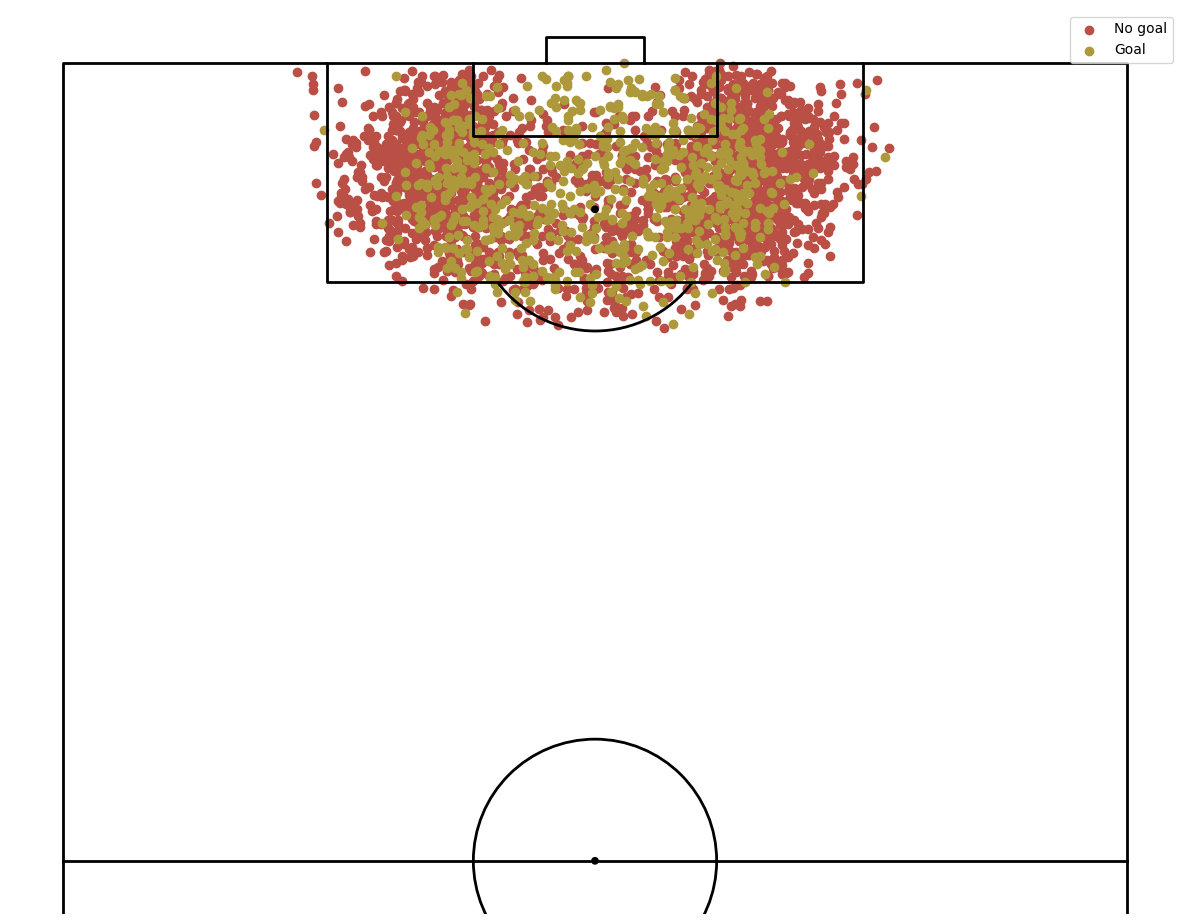

In [5]:
pitch = VerticalPitch(line_color='black',half=True, pitch_type='custom', pitch_length=120, pitch_width=80, line_zorder = 4,goal_type='box',
    goal_alpha=1)

fig, ax = pitch.draw(figsize=(12, 10))

no_goals=pitch.scatter(
    df_no_goals['x'],df_no_goals['y'],
    c='#ba4f45', 
    marker='o',  
    ax=ax, label="No goal"
)
goals = pitch.scatter(
    df_goals['x'], df_goals['y'],
    c='#ad993c', 
    marker='o',  
    ax=ax, label="Goal" 
)

plt.legend(loc='best')
plt.show()

c:\Users\ADAM\scoop\apps\python\3.12.4\Lib\site-packages\mplsoccer\_pitch_plot.py:167: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


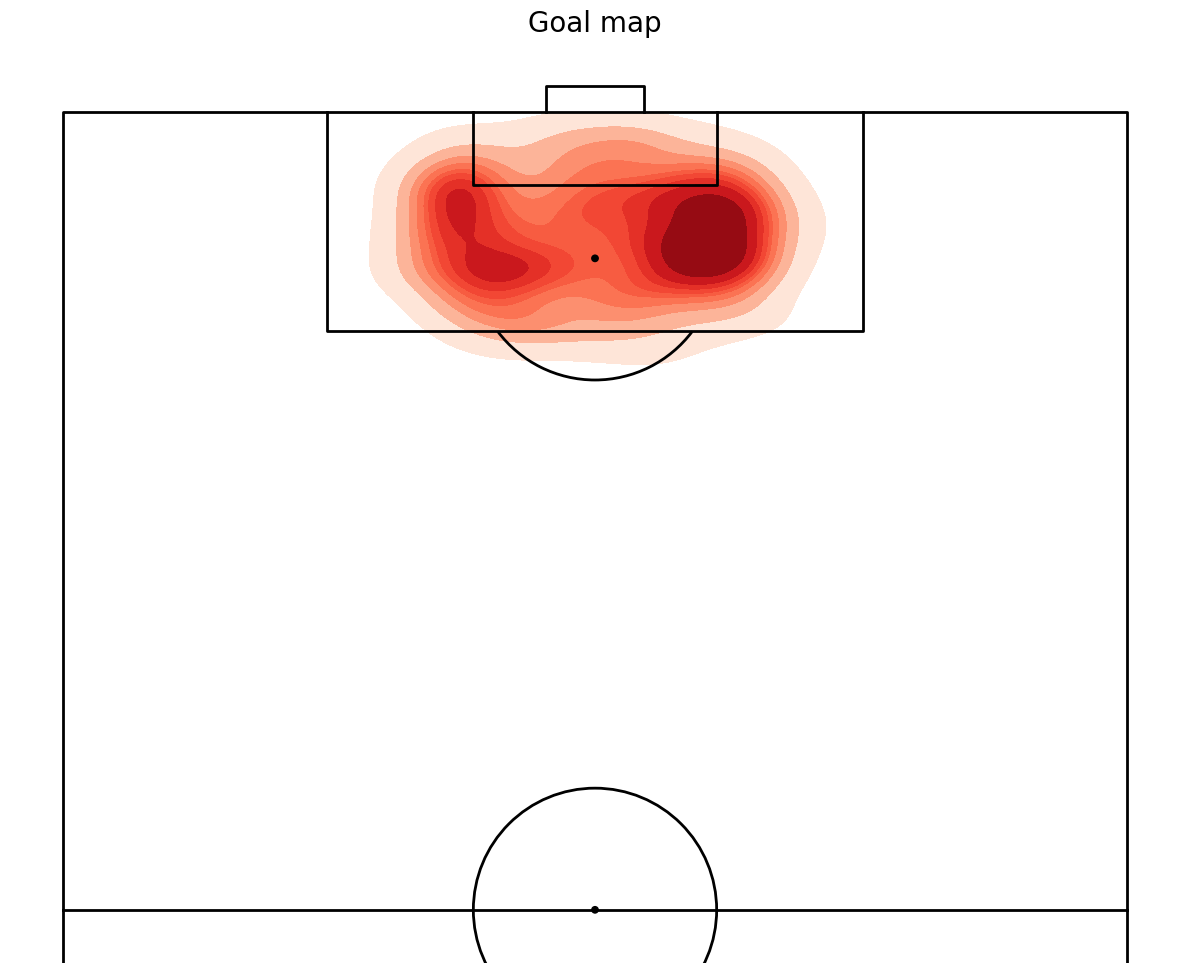

In [6]:
pitch = VerticalPitch(line_color='black',half=True, pitch_type='custom', pitch_length=120, pitch_width=80, line_zorder = 4,goal_type='box',
    goal_alpha=1)

fig, ax = pitch.draw(figsize=(12, 10))

pitch.kdeplot(
    x=df_goals['x'],
    y=df_goals['y'],
    ax=ax,
    cmap='Reds',      
    shade=True      
)

fig.suptitle('Goal map' , fontsize = 20)
plt.show()


c:\Users\ADAM\scoop\apps\python\3.12.4\Lib\site-packages\mplsoccer\_pitch_plot.py:167: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


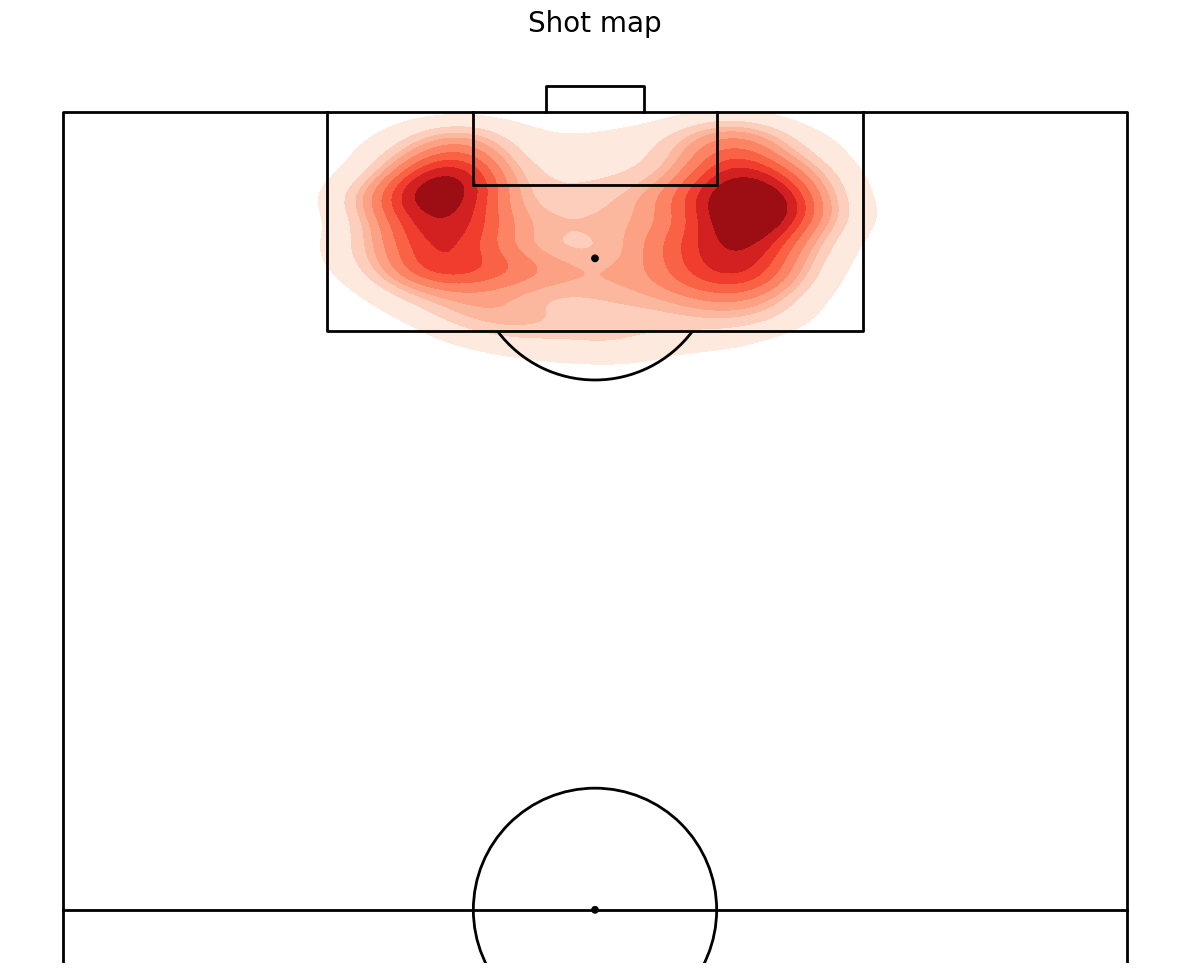

In [7]:
pitch = VerticalPitch(line_color='black',half=True, pitch_type='custom', pitch_length=120, pitch_width=80, line_zorder = 4,goal_type='box',
    goal_alpha=1)

fig, ax = pitch.draw(figsize=(12, 10))

pitch.kdeplot(df_shot['x'],df_shot['y'],ax=ax,cmap='Reds',shade=True)
fig.suptitle('Shot map' , fontsize = 20)
plt.show()

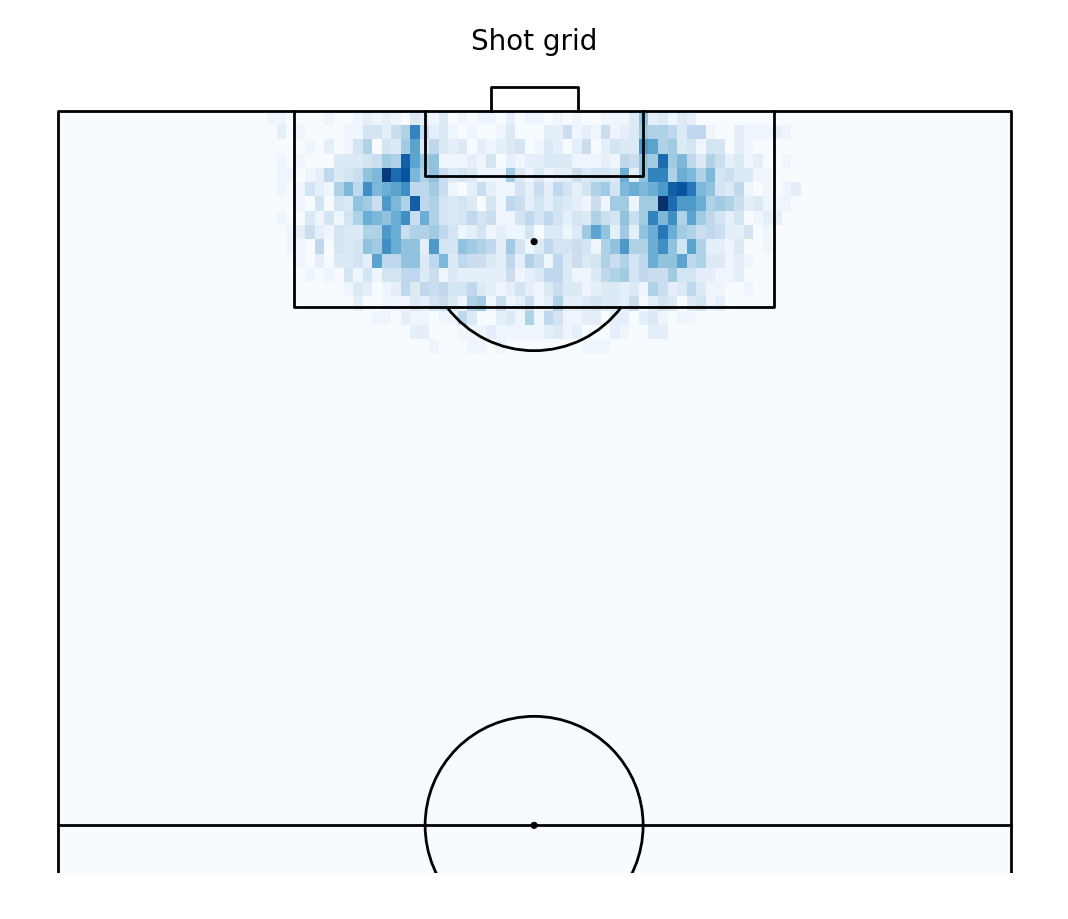

In [8]:
pitch = VerticalPitch(line_color='black',half=True, pitch_type='custom', pitch_length=120, pitch_width=80, line_zorder = 4,goal_type='box',
    goal_alpha=1)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
bin_statistic_shots = pitch.bin_statistic(df_shot["x"], df_shot["y"], bins=100)
shot_grid = pitch.heatmap(bin_statistic_shots, ax=ax["pitch"], cmap='Blues')

fig.suptitle('Shot grid' , fontsize = 20)
plt.show()


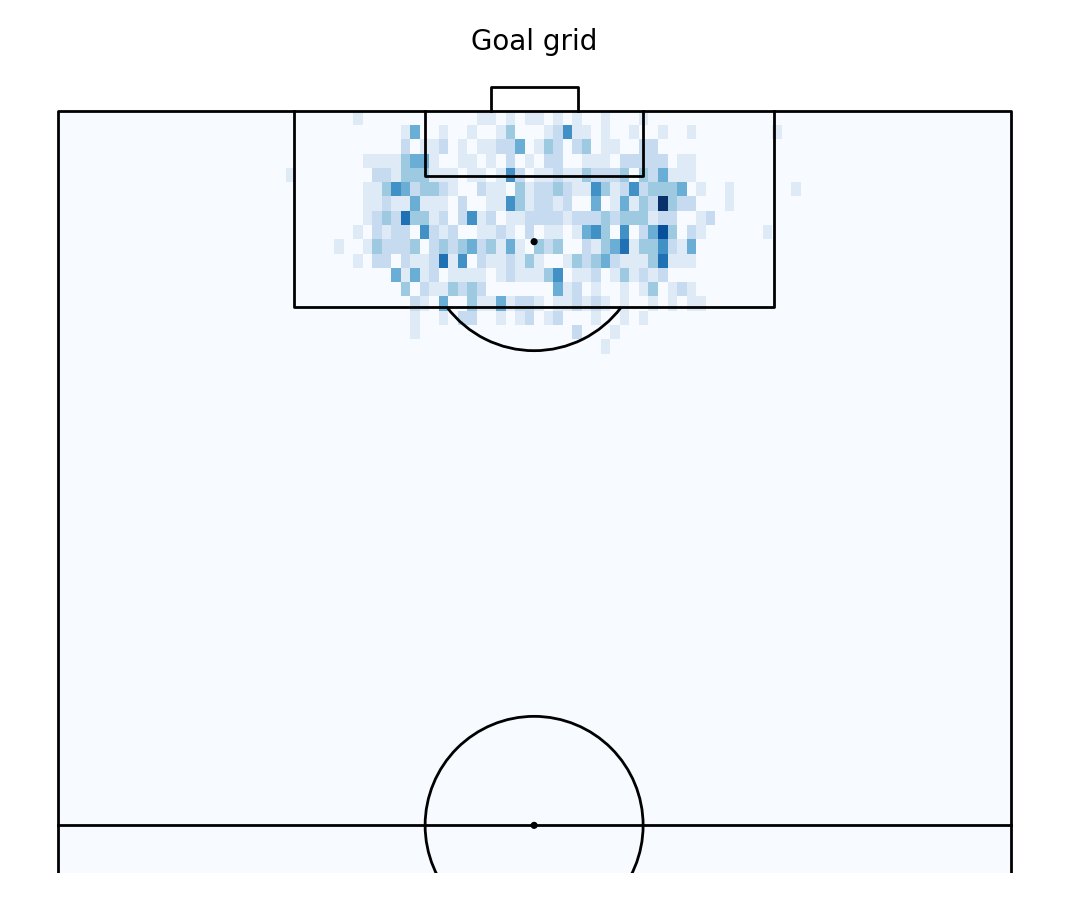

In [9]:
pitch = VerticalPitch(line_color='black',half=True, pitch_type='custom', pitch_length=120, pitch_width=80, line_zorder = 4,goal_type='box',
    goal_alpha=1)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
bin_statistic_goals = pitch.bin_statistic(df_goals["x"], df_goals["y"], bins=100)
shot_grid = pitch.heatmap(bin_statistic_goals, ax=ax["pitch"], cmap='Blues')

fig.suptitle('Goal grid' , fontsize = 20)
plt.show()


C:\Users\ADAM\AppData\Local\Temp\ipykernel_17992\1148321986.py:6: RuntimeWarning: invalid value encountered in divide
  bin_statistic["statistic"] = bin_statistic_goals["statistic"]/bin_statistic["statistic"]


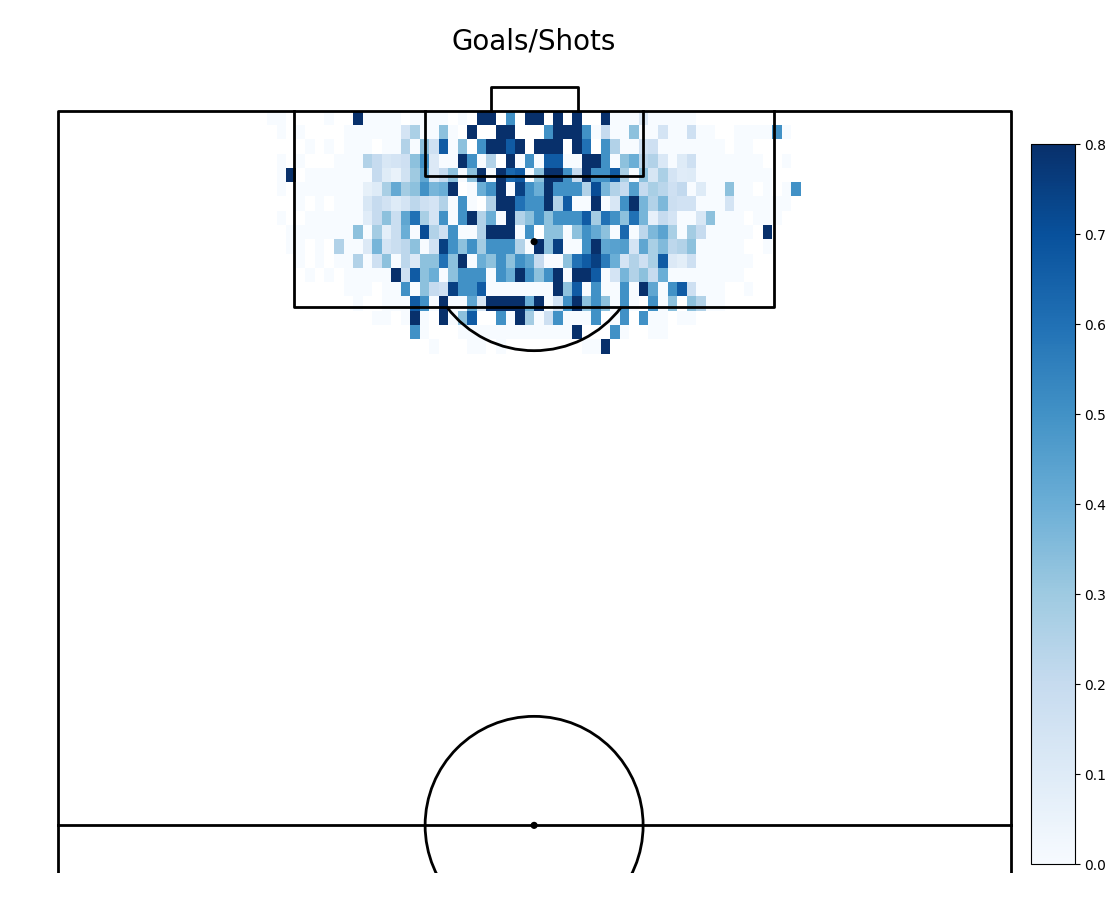

In [10]:
pitch = VerticalPitch(line_color='black',half=True, pitch_type='custom', pitch_length=120, pitch_width=80, line_zorder = 4,goal_type='box',
    goal_alpha=1)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
bin_statistic = pitch.bin_statistic(df_shot['x'], df_shot['y'], bins = 100)
bin_statistic["statistic"] = bin_statistic_goals["statistic"]/bin_statistic["statistic"]
pcm = pitch.heatmap(bin_statistic, ax=ax["pitch"], cmap='Blues', vmin = 0, vmax = 0.8)
ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Goals/Shots' , fontsize = 20)
plt.show()

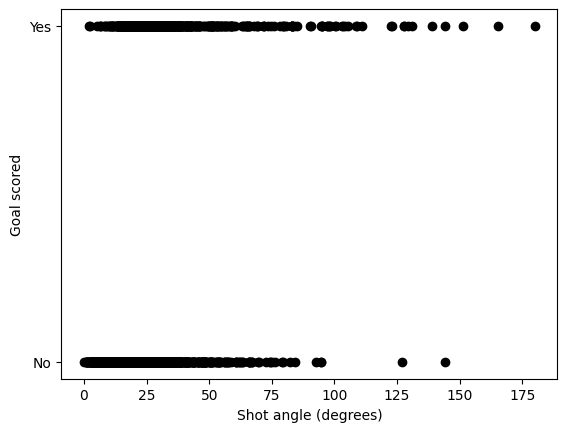

In [11]:
fig, ax = plt.subplots()
ax.plot(df_shot['angle'], df_shot['goal'], linestyle='none', marker= '.', markersize= 12, color='black')
ax.set_ylabel('Goal scored')
ax.set_xlabel("Shot angle (degrees)")
plt.ylim((-0.05,1.05))
ax.set_yticks([0,1])
ax.set_yticklabels(['No','Yes'])
plt.show()

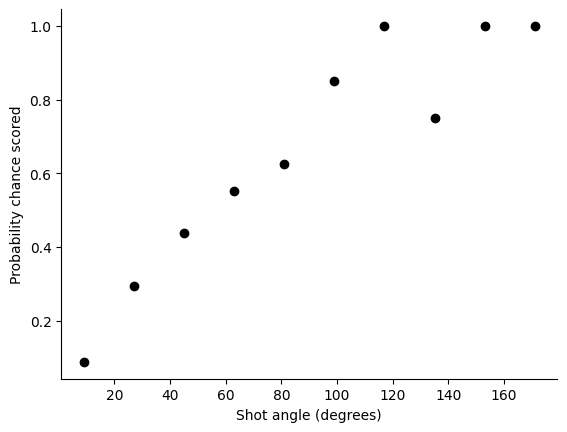

In [12]:
shotcount_ang = np.histogram(df_shot['angle'], bins=10, range=[0, 180])
df_goals=df_shot[df_shot['shot_outcome']=='Goal'].copy()
goalcount_ang = np.histogram(df_goals['angle'], bins=10, range=[0, 180])
np.seterr(divide='ignore', invalid='ignore')
prob_goal = np.divide(goalcount_ang[0], shotcount_ang[0])
angle = shotcount_ang[1]
midangle = (angle[:-1] + angle[1:])/2
fig,ax = plt.subplots()
ax.plot(midangle, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Shot angle (degrees)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

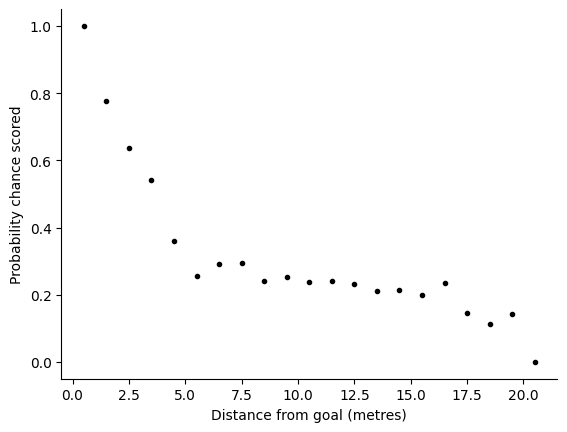

In [13]:
shotcount_dist = np.histogram(df_shot['distance'],bins=70,range=[0, 70])
goalcount_dist = np.histogram(df_goals['distance'],bins=70,range=[0, 70])
prob_goal = np.divide(goalcount_dist[0],shotcount_dist[0])
distance = shotcount_dist[1]
middistance= (distance[:-1] + distance[1:])/2
fig, ax = plt.subplots()
ax.plot(middistance, prob_goal, linestyle='none', marker= '.', color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Distance from goal (metres)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

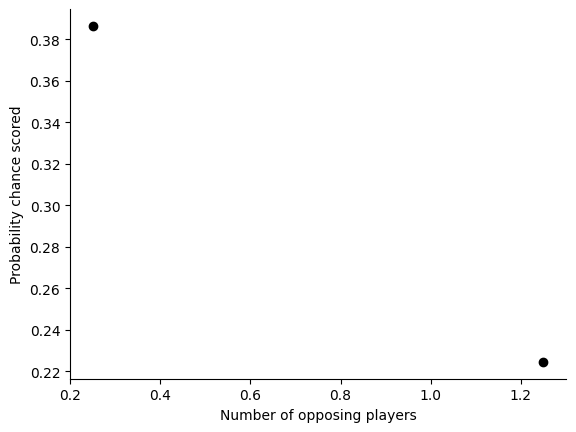

In [14]:
shotcount_nbr = np.histogram(df_shot['num_opposing_players'], bins=20, range=[0, 10])
df_goals=df_shot[df_shot['shot_outcome']=='Goal'].copy()
goalcount_nbr = np.histogram(df_goals['num_opposing_players'], bins=20, range=[0, 10])
np.seterr(divide='ignore', invalid='ignore')
prob_goal = np.divide(goalcount_nbr[0], shotcount_nbr[0])
num_opposing_players = shotcount_nbr[1]
midnum_opposing_players = (num_opposing_players[:-1] + num_opposing_players[1:])/2
fig,ax = plt.subplots()
ax.plot(midnum_opposing_players, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Number of opposing players")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

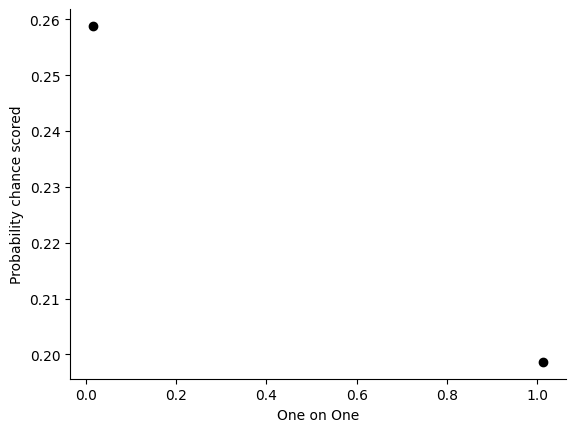

In [15]:
shotcount_underPressure = np.histogram(df_shot['underPressure'], bins=70, range=[0, 2])
df_goals=df_shot[df_shot['shot_outcome']=='Goal'].copy()
goalcount_underPressure = np.histogram(df_goals['underPressure'], bins=70, range=[0, 2])
np.seterr(divide='ignore', invalid='ignore')
prob_goal = np.divide(goalcount_underPressure[0], shotcount_underPressure[0])
underPressure = shotcount_underPressure[1]
midunderPressure = (underPressure[:-1] + underPressure[1:])/2
fig,ax = plt.subplots()
ax.plot(midunderPressure, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("One on One")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

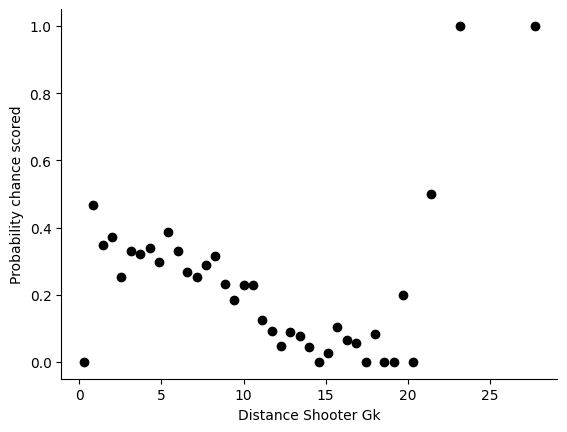

In [16]:
shotcount_DistanceShooterGk = np.histogram(df_shot['DistanceShooterGk'], bins=70, range=[0, 40])
df_goals=df_shot[df_shot['shot_outcome']=='Goal'].copy()
goalcount_DistanceShooterGk = np.histogram(df_goals['DistanceShooterGk'], bins=70, range=[0, 40])
np.seterr(divide='ignore', invalid='ignore')
prob_goal = np.divide(goalcount_DistanceShooterGk[0], shotcount_DistanceShooterGk[0])
DistanceShooterGk = shotcount_DistanceShooterGk[1]
midDistanceShooterGk = (DistanceShooterGk[:-1] + DistanceShooterGk[1:])/2
fig,ax = plt.subplots()
ax.plot(midDistanceShooterGk, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Distance Shooter Gk")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

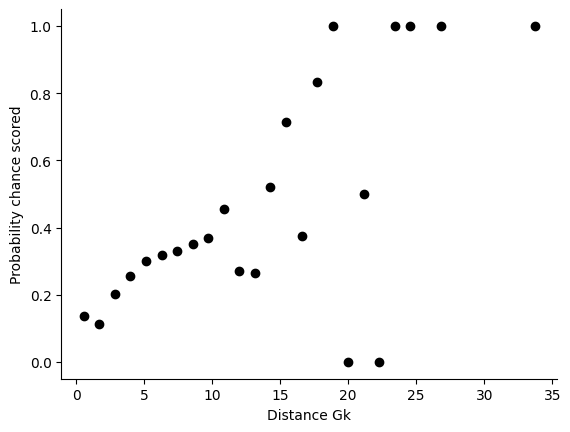

In [17]:
shotcount_DistanceGk = np.histogram(df_shot['DistanceGk'], bins=70, range=[-40, 40])
df_goals=df_shot[df_shot['shot_outcome']=='Goal'].copy()
goalcount_DistanceGk = np.histogram(df_goals['DistanceGk'], bins=70, range=[-40, 40])
np.seterr(divide='ignore', invalid='ignore')
prob_goal = np.divide(goalcount_DistanceGk[0], shotcount_DistanceGk[0])
DistanceGk = shotcount_DistanceGk[1]
midDistanceGk = (DistanceGk[:-1] + DistanceGk[1:])/2
fig,ax = plt.subplots()
ax.plot(midDistanceGk, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Distance Gk")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


In [18]:
x = df_shot[['angle','distance','DistanceShooterGk','DistanceGk','num_opposing_players']]
x.fillna(0, inplace=True)
y = df_shot['goal']

import xgboost as xgb
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.01,
    'max_depth': 4,
    'subsample': 0.9,
    'colsample_bytree': 0.8
}

evals = [(dtrain, 'train'), (dtest, 'test')]
bst = xgb.train(params, dtrain, num_boost_round=2500, evals=evals, early_stopping_rounds=250)

y_pred_prob = bst.predict(dtest)




C:\Users\ADAM\AppData\Local\Temp\ipykernel_17992\1993542442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.fillna(0, inplace=True)


[0]	train-logloss:0.55863	test-logloss:0.52248
[1]	train-logloss:0.55698	test-logloss:0.52158
[2]	train-logloss:0.55523	test-logloss:0.52064
[3]	train-logloss:0.55355	test-logloss:0.51977
[4]	train-logloss:0.55187	test-logloss:0.51875
[5]	train-logloss:0.55072	test-logloss:0.51816
[6]	train-logloss:0.54912	test-logloss:0.51741
[7]	train-logloss:0.54753	test-logloss:0.51652
[8]	train-logloss:0.54604	test-logloss:0.51571
[9]	train-logloss:0.54496	test-logloss:0.51519
[10]	train-logloss:0.54346	test-logloss:0.51457
[11]	train-logloss:0.54247	test-logloss:0.51407
[12]	train-logloss:0.54105	test-logloss:0.51336
[13]	train-logloss:0.53961	test-logloss:0.51260
[14]	train-logloss:0.53823	test-logloss:0.51183
[15]	train-logloss:0.53690	test-logloss:0.51109
[16]	train-logloss:0.53555	test-logloss:0.51038
[17]	train-logloss:0.53459	test-logloss:0.50993
[18]	train-logloss:0.53329	test-logloss:0.50924
[19]	train-logloss:0.53202	test-logloss:0.50857
[20]	train-logloss:0.53076	test-logloss:0.50798
[2

In [19]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

y_pred_binary = (y_pred_prob >= 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

cm = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(y_test, y_pred_binary))


Accuracy: 0.79
ROC-AUC Score: 0.69
Confusion Matrix:
[[226  10]
 [ 54   9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       236
           1       0.47      0.14      0.22        63

    accuracy                           0.79       299
   macro avg       0.64      0.55      0.55       299
weighted avg       0.74      0.79      0.74       299



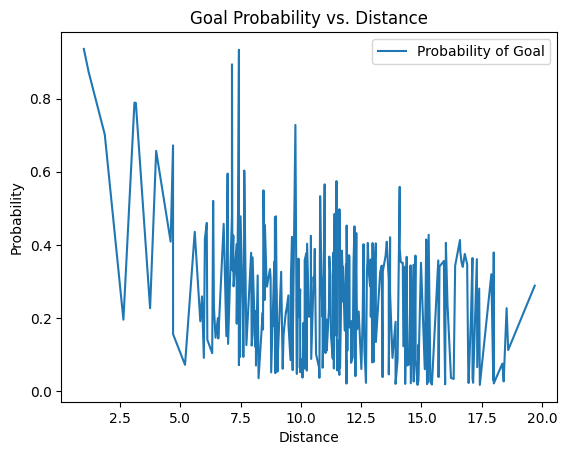

In [23]:
import matplotlib.pyplot as plt

sorted_indices = np.argsort(x_test['distance'])
sorted_distances = x_test['distance'].iloc[sorted_indices]
sorted_probabilities = y_pred_prob[sorted_indices]

plt.plot(sorted_distances, sorted_probabilities, label="Probability of Goal")
plt.xlabel("Distance")
plt.ylabel("Probability")
plt.title("Goal Probability vs. Distance")
plt.legend()
plt.show()


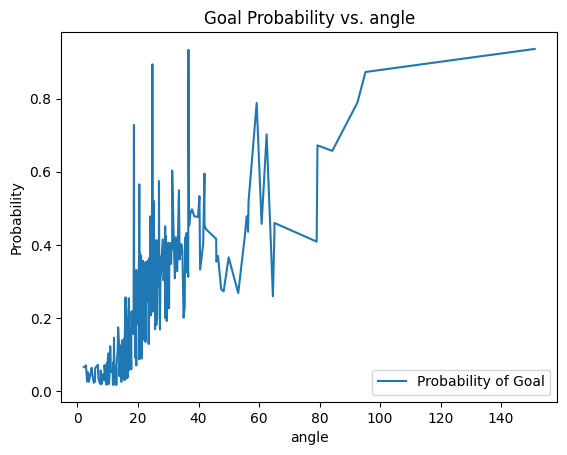

In [22]:
sorted_indices = np.argsort(x_test['angle'])
sorted_distances = x_test['angle'].iloc[sorted_indices]
sorted_probabilities = y_pred_prob[sorted_indices]

plt.plot(sorted_distances, sorted_probabilities, label="Probability of Goal")
plt.xlabel("angle")
plt.ylabel("Probability")
plt.title("Goal Probability vs. angle")
plt.legend()
plt.show()

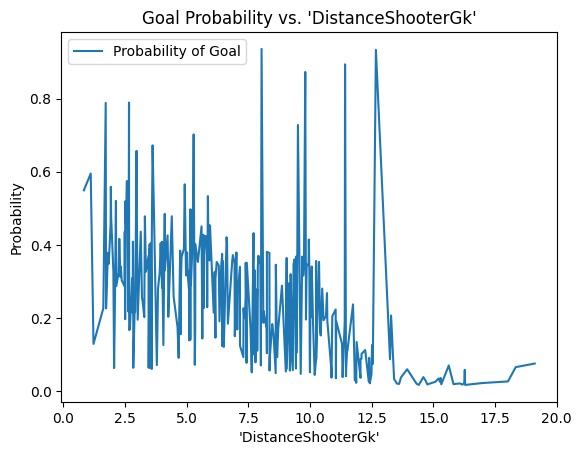

In [24]:
sorted_indices = np.argsort(x_test['DistanceShooterGk'])
sorted_distances = x_test['DistanceShooterGk'].iloc[sorted_indices]
sorted_probabilities = y_pred_prob[sorted_indices]

plt.plot(sorted_distances, sorted_probabilities, label="Probability of Goal")
plt.xlabel("'DistanceShooterGk'")
plt.ylabel("Probability")
plt.title("Goal Probability vs. 'DistanceShooterGk'")
plt.legend()
plt.show()

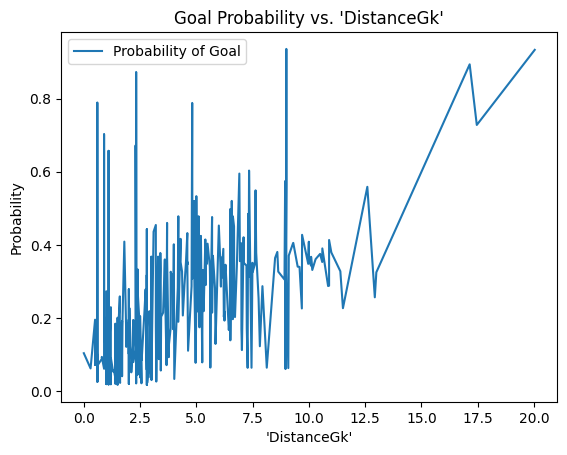

In [29]:
sorted_indices = np.argsort(x_test['DistanceGk'])
sorted_distances = x_test['DistanceGk'].iloc[sorted_indices]
sorted_probabilities = y_pred_prob[sorted_indices]

plt.plot(sorted_distances, sorted_probabilities, label="Probability of Goal")
plt.xlabel("'DistanceGk'")
plt.ylabel("Probability")
plt.title("Goal Probability vs. 'DistanceGk'")
plt.legend()
plt.show()

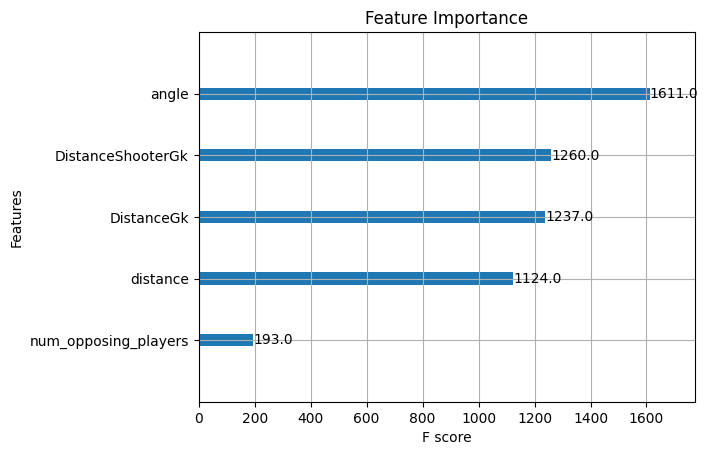

In [21]:
xgb.plot_importance(bst, importance_type='weight', title='Feature Importance', xlabel='F score', ylabel='Features')
plt.show()

In [30]:
bst.save_model('xG_foot_openplay_inside_1on1.json')